<a target="_blank" href="https://colab.research.google.com/github/ArtificialIntelligenceToolkit/aitk/blob/master/notebooks/StringGA.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install aitk --upgrade --quiet

In [2]:
from aitk.algorithms.ga import GeneticAlgorithm
import string
import random

In [3]:
class StringGA(GeneticAlgorithm):
    """
    An example of using the GeneticAlgorithm class to solve a particular
    problem, in this case decoding a secret message.
    """
    SECRET = list('ZRaUV[X`-Va-V`-YVXR-N-dRN`RY')
    
    def __init__(self, popSize, verbose=False):
        length = len(self.SECRET)
        super().__init__(length, popSize, verbose)
        
    def decode(self, s): return [chr(ord(ch) - 13) for ch in s]
    def encode(self, s): return [chr(ord(ch) + 13) for ch in s]
    
    def fitness(self, chromosome, index=None):
        """
        Fitness is the total number of matching characters.
        """
        secret = self.decode(self.SECRET)
        return sum([chromosome[i] == secret[i] for i in range(len(secret))])
    
    def is_done(self):
        """
        Stop when the fitness of the the best member of the current
        population is equal to the maximum fitness.
        """
        return self.fitness(self.bestEver) == self.length

    def report(self):
        print("Generation %4d Fitness %3d String %s" % \
              (self.generation, self.bestEverScore, "".join(self.bestEver)))
    
    def make_random_gene(self):
        """
        Function to generate a new random chromosome.
        """
        chars = string.ascii_uppercase + " "
        return random.choice(chars)

In [4]:
ga = StringGA(500) # population size
bestFound = ga.evolve(
    generations=1000, 
    crossover_rate=0.6, 
    mutation_rate=0.005, 
    elite_percent=0.1,
)

Genetic algorithm
  Chromosome length: 28
  Population size: 500
  Maximum number of generations: 1000
  Crossover rate: 0.6
  Mutation rate: 0.005
  Elite percentage: 0.1
  Elite count: 50
Generation    0 Fitness   5 String LNYTHROSFNWODATJIRF ZNWI SIO
Generation    1 Fitness   6 String ZETOHAMHIUTUGXQVVSSKG ZEKOEN
Generation    2 Fitness   7 String XFYZYVKSICGRIFFPNVXLAVAYAZEL
Generation    3 Fitness   7 String XFYZYVKSICGRIFFPNVXLAVAYAZEL
Generation    4 Fitness   7 String XFYZYVKSICGRIFFPNVXLAVAYAZEL
Generation    5 Fitness   9 String MEUQIIAO NYJXN LPGEP  WCTVLY
Generation    6 Fitness  10 String LADUBNKIRIR ISQTGNGXAVAYAZEL
Generation    7 Fitness  11 String VEJFCNKIRIR ISQTGNGXAVAYAZEL
Generation    8 Fitness  11 String VEJFCNKIRIR ISQTGNGXAVAYAZEL
Generation    9 Fitness  12 String MEUQIIAO NYJXN LPGE ZNWI SEL
Generation   10 Fitness  12 String MEUQIIAO NYJXN LPGE ZNWI SEL
Generation   11 Fitness  12 String MEUQIIAO NYJXN LPGE ZNWI SEL
Generation   12 Fitness  13 String  DTIIAM

METHINKS IT IS LIKE A WEASEL


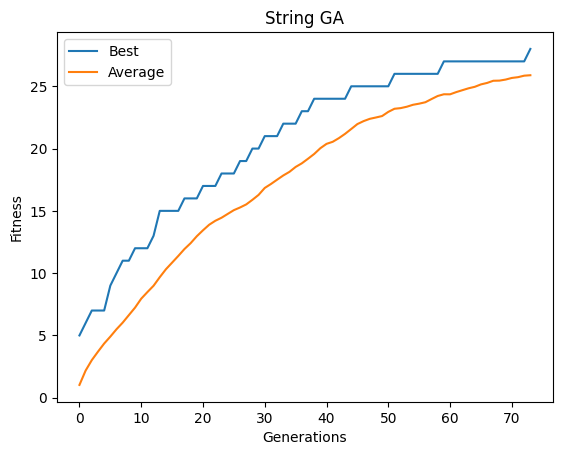

In [6]:
print("".join(bestFound))
ga.plot_stats("String GA")

# References

1. https://en.wikipedia.org/wiki/Weasel_program
